# Задача № 19
# Матричное умножение
### Выполнил: Колабин Ю.В.
### Группа: 3822М1ФИии1

### **Условие**
Вычисление элементов произведения $C$ двух квадратных матриц $A = (a_{ij})$ и $B = (b_{ij})$ по формулам

$$
C_{ij} = \sum_{k=1}^{n} a_{ik}b_{kj}
$$
где $(i = 1,2...,n; j = 1,2,...,n)$

легко реализуется с помощью трех вложенных циклов по $i$, по $j$ и по $k$. Различные варианты алгоритма можно получить перестановкой циклов.



### **Подзадачи**
1. Написать шесть функций *multijk, multikj, multjik, ...,* реализующих каждый из этих вариантов.
2. Для серии случайно сгенерированных матриц больших размеров замерить время, требуемое этими функциями.
3. Нарисовать графики зависимости времени от порядка матриц. Объяснить, почему требуется различное время на выполнение каждой из написанных вами фукций.

### **Решение**

### **Подзадача № 1. Реализация шести функций, представляющих собой процесс перемножения матриц**


Матрицы $A$ и $B$ квадратные, из чего следует, что эти матрицы должны быть одинаковой размерности, иначе перемножение невозможно. Результатом перемножения будет являться матрица $C$ той же размерности, что и у $A$ и $B$.

In [169]:
import random as rnd

Напишу несколько полезных функций

Функция для заполнения матрицы рандомными значениями:

In [170]:
def create_random_matrix(dimension):
    matrix = []
    for i in range(dimension):
        matrix.append([])
        for j in range(dimension):
            matrix[i].append(rnd.randint(-10, 10))
    return matrix

Функция для заполнения матрицы нулями:

In [171]:
def fill_by_zero(dimension, matrix):
    for x in range(dimension):
        matrix.append([])
        for y in range(dimension):
            matrix[x].append(0)

Создаю две квадратные матрицы, которые в последующем буду перемножать:

In [172]:
sq_matrix_dimension = 200

a_matrix = create_random_matrix(sq_matrix_dimension)
b_matrix = create_random_matrix(sq_matrix_dimension)

##### Реализация № 1 (*i j k*):

In [173]:
def multijk(dimension, a, b):
    matrix = []
    
    fill_by_zero(dimension, matrix)

    for i in range(dimension):
        for j in range(dimension):
            for k in range(dimension):
                matrix[i][j] += a[i][k] * b[k][j]
                
    return matrix

##### Реализация № 2 (*j i k*):

In [174]:
def multjik(dimension, a, b):
    matrix = []
    
    fill_by_zero(dimension, matrix)

    for j in range(dimension):
        for i in range(dimension):
            for k in range(dimension):
                matrix[i][j] += a[i][k] * b[k][j]
                
    return matrix

##### Реализация № 3 (*k i j*):

In [175]:
def multkij(dimension, a, b):
    matrix = []
    
    fill_by_zero(dimension, matrix)

    for k in range(dimension):
        for i in range(dimension):
            for j in range(dimension):
                matrix[i][j] += a[i][k] * b[k][j]
                
    return matrix

##### Реализация № 4 (*k j i*):

In [176]:
def multkji(dimension, a, b):
    matrix = []
    
    fill_by_zero(dimension, matrix)

    for k in range(dimension):
        for j in range(dimension):
            for i in range(dimension):
                matrix[i][j] += a[i][k] * b[k][j]
                
    return matrix

##### Реализация № 5 (*i k j*):

In [177]:
def multikj(dimension, a, b):
    matrix = []
    
    fill_by_zero(dimension, matrix)

    for i in range(dimension):
        for k in range(dimension):
            for j in range(dimension):
                matrix[i][j] += a[i][k] * b[k][j]
                
    return matrix

##### Реализация № 6 (*j k i*):

In [178]:
def multjki(dimension, a, b):
    matrix = []
    
    fill_by_zero(dimension, matrix)

    for j in range(dimension):
        for k in range(dimension):
            for i in range(dimension):
                matrix[i][j] += a[i][k] * b[k][j]
                
    return matrix

### **Подзадача № 2. Измерение времени выполнения функций**


Для измерения времени работы функции воспользуюсь библиотекой *time*:

In [179]:
import time

In [180]:
import numpy as np

Измеряю время работы функций при различных размерностях и записываю их для последующего отображения:

In [181]:
final_dimension = 250

In [182]:
sq_matrix_dimension = 10

ijk_kpts = []
jik_kpts = []
kij_kpts = []
kji_kpts = []
ikj_kpts = []
jki_kpts = []
com_at_kpts = []

kpts_num = []

while sq_matrix_dimension <= final_dimension:

    a_matrix = create_random_matrix(sq_matrix_dimension)
    b_matrix = create_random_matrix(sq_matrix_dimension)

    kpts_num.append(sq_matrix_dimension)

    #--------------------------------------
    start = time.time()
    c_matrix = multijk(sq_matrix_dimension, a_matrix, b_matrix)
    end = time.time()
    ijk_kpts.append(end - start)
    #--------------------------------------
    start = time.time()
    c_matrix = multjik(sq_matrix_dimension, a_matrix, b_matrix)
    end = time.time()
    jik_kpts.append(end - start)
    #--------------------------------------
    start = time.time()
    c_matrix = multkij(sq_matrix_dimension, a_matrix, b_matrix)
    end = time.time()
    kij_kpts.append(end - start)
    #--------------------------------------
    start = time.time()
    c_matrix = multkji(sq_matrix_dimension, a_matrix, b_matrix)
    end = time.time()
    kji_kpts.append(end - start)
    #--------------------------------------
    start = time.time()
    c_matrix = multikj(sq_matrix_dimension, a_matrix, b_matrix)
    end = time.time()
    ikj_kpts.append(end - start)
    #--------------------------------------
    start = time.time()
    c_matrix = multjki(sq_matrix_dimension, a_matrix, b_matrix)
    end = time.time()
    jki_kpts.append(end - start)
    #--------------------------------------
    start = time.time()
    c_matrix = np.array(a_matrix) @ np.array(b_matrix)
    end = time.time()
    com_at_kpts.append(end - start)

    sq_matrix_dimension += 5

### **Подзадача № 3. Графики зависимости времени от порядка матрицы различных функций**

In [183]:
import matplotlib.pyplot as plt

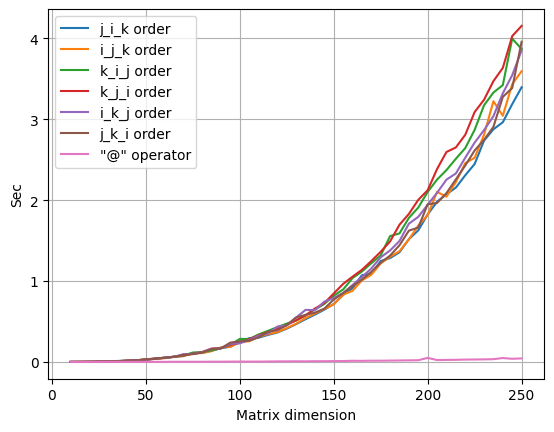

In [184]:
plt.plot(kpts_num, jik_kpts, label="j_i_k order")
plt.plot(kpts_num, ijk_kpts, label="i_j_k order")
plt.plot(kpts_num, kij_kpts, label="k_i_j order")
plt.plot(kpts_num, kji_kpts, label="k_j_i order")
plt.plot(kpts_num, ikj_kpts, label="i_k_j order")
plt.plot(kpts_num, jki_kpts, label="j_k_i order")
plt.plot(kpts_num, com_at_kpts, label="\"@\" operator")
plt.legend(loc="upper left")
plt.xlabel("Matrix dimension")
plt.ylabel("Sec")
plt.grid(True)


По графику видно, что функция перемножения матриц, где циклы расположены в порядке $k, j, i$ и $k, i, j$ показывают себя ощутимо хуже остальных перестановок циклов. Все функции имеют разное время работы, т.к. в каждой заложен алгоритм, имеющий разные способы обхода матрицы, ускоряющий/замедляющий время работы функции. Решение "в лоб", как видно, совсем неэффективно, что показывает оператор "@". Данный оператор эффективно перемножает матрицы за счет различных агоритмов, ускоряющих вычисления, например, хэшироване.

При использовании оператора "@", перемножение выполняется, казалось бы, за константное время, но все же оно линейно увеличивается с ростом размерности матриц.

Также на графике видны скачки, связанные с железом.